<a href="https://colab.research.google.com/github/urooba/movie-recommendation-system/blob/master/Peshawar_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the water quality data from "/content/AdnanSyed2022_ Groundwater Data Peshawar Pakistan.xlsx" to determine if the water is drinkable in different areas of Peshawar. The analysis should include data loading, cleaning, training three classification models to predict drinkability, displaying the drinkability status for all areas in a table, and specifically highlighting areas with non-drinkable water in a separate table.

## Load data

### Subtask:
Load the data from the provided Excel file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the Excel file into a DataFrame.



In [3]:
import pandas as pd

df = pd.read_excel("/content/AdnanSyed2022_ Groundwater Data Peshawar Pakistan.xlsx")
df.head()

,code,PH,Conductivity,TDS
0,0,7.69,1023,473
1,4,7.71,755,351
2,5,7.87,905,442
3,6,7.87,1109,544
4,8,7.61,760,349


In [ ]:
# prompt: What does "code" represent in this data

Based on common practices in datasets related to geographical locations or surveys, "code" likely represents a **unique identifier** or **numerical code** assigned to each specific sampling **location or area** within Peshawar.

It's used to uniquely identify each row in the dataset, corresponding to a particular groundwater sample or monitoring point.

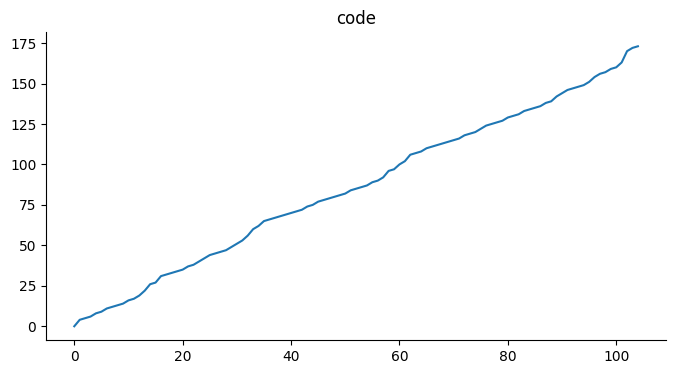

In [26]:
# @title code

from matplotlib import pyplot as plt
df['code'].plot(kind='line', figsize=(8, 4), title='code')
plt.gca().spines[['top', 'right']].set_visible(False)

## Display data

### Subtask:
Show the first few rows and the column names of the DataFrame to understand its structure.


**Reasoning**:
Display the first few rows and the column names of the DataFrame to understand its structure as requested by the instructions.



In [5]:
display(df.head())
print(df.columns)

,code,PH,Conductivity,TDS
0,0,7.69,1023,473
1,4,7.71,755,351
2,5,7.87,905,442
3,6,7.87,1109,544
4,8,7.61,760,349


Index(['code', 'PH', 'Conductivity', 'TDS'], dtype='object')


## Clean data

### Subtask:
Handle any missing values, outliers, or inconsistencies in the data. This may involve imputation, removal, or transformation of data points.


**Reasoning**:
Check for missing values in the DataFrame.



In [7]:
display(df.isnull().sum())

,0
code,0
PH,0
Conductivity,0
TDS,0


**Reasoning**:
Since there are no missing values, the next step is to check for outliers in the numerical columns using box plots for visualization.



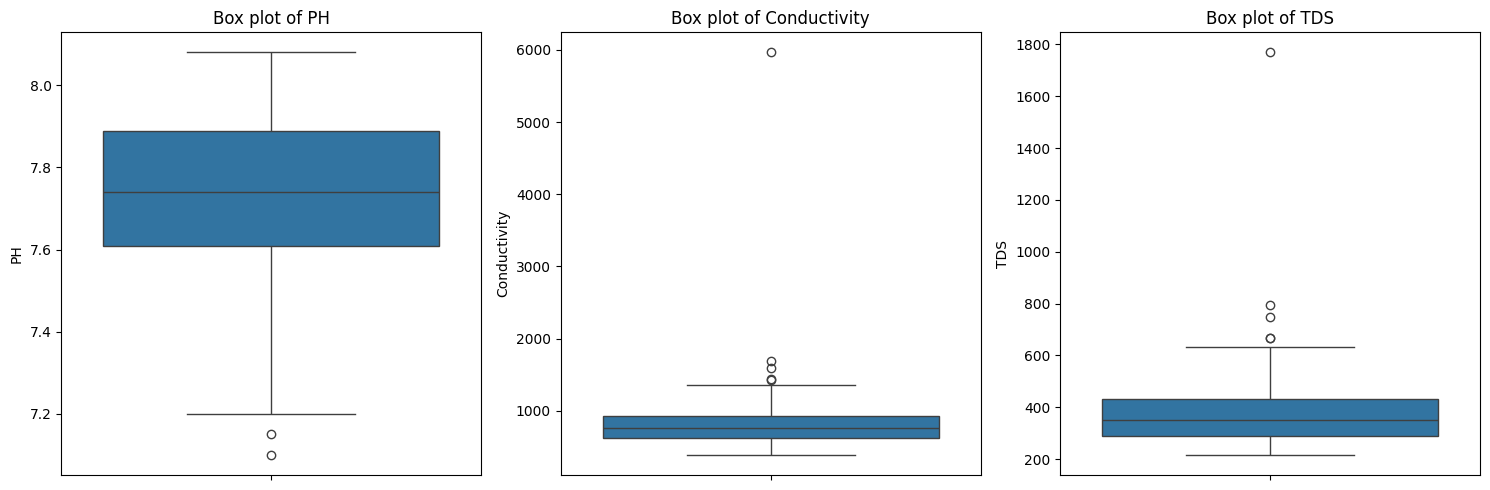

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['PH', 'Conductivity', 'TDS']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
The box plots show potential outliers in 'Conductivity' and 'TDS'. A common strategy for handling outliers is to remove rows where the values fall outside a certain range (e.g., based on IQR or visual inspection). Based on the box plots, I will remove rows where 'Conductivity' is above approximately 3000 and 'TDS' is above approximately 1500.



In [11]:
df_cleaned = df[(df['Conductivity'] <= 3000) & (df['TDS'] <= 1500)].copy()
display(df_cleaned.describe())

,code,PH,Conductivity,TDS
count,103.000000,103.000000,103.000000,103.000000
mean,84.970874,7.735825,815.621359,380.669903
std,48.177461,0.205161,248.724910,116.787757
min,0.000000,7.100000,474.000000,216.000000
25%,44.500000,7.610000,638.000000,289.500000
50%,84.000000,7.740000,760.000000,351.000000
75%,125.500000,7.895000,931.000000,432.500000
max,173.000000,8.080000,1695.000000,795.000000


## Define target variable

### Subtask:
Create a target variable indicating whether the water is drinkable based on relevant parameters and standards.


**Reasoning**:
Define the `is_drinkable` function and apply it to the cleaned DataFrame to create the 'drinkable' column.



In [13]:
def is_drinkable(row):
    """Determines if water is drinkable based on pH, Conductivity, and TDS."""
    ph_criteria = 6.5 <= row['PH'] <= 8.5
    conductivity_criteria = row['Conductivity'] <= 1000
    tds_criteria = row['TDS'] <= 500
    if ph_criteria and conductivity_criteria and tds_criteria:
        return 1
    else:
        return 0

df_cleaned['drinkable'] = df_cleaned.apply(is_drinkable, axis=1)
display(df_cleaned.head())

,code,PH,Conductivity,TDS,drinkable
0,0,7.69,1023,473,0
1,4,7.71,755,351,1
2,5,7.87,905,442,1
3,6,7.87,1109,544,0
4,8,7.61,760,349,1


## Split data

### Subtask:
Split the data into training and testing sets for model development and evaluation.


**Reasoning**:
Split the cleaned data into training and testing sets for model development and evaluation.



In [15]:
from sklearn.model_selection import train_test_split

X = df_cleaned[['PH', 'Conductivity', 'TDS']]
y = df_cleaned['drinkable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (82, 3)
Shape of X_test: (21, 3)
Shape of y_train: (82,)
Shape of y_test: (21,)


## Train models

### Subtask:
Train three different classification models (e.g., Logistic Regression, Decision Tree, Random Forest) to predict water drinkability.


**Reasoning**:
Import the necessary classification models, instantiate them, and train each model using the training data.



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the models
log_reg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Train the models
log_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Decision Tree model trained.")
print("Random Forest model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.


## Evaluate models

### Subtask:
Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the performance of each trained model using appropriate metrics.



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression
y_pred_lr = log_reg_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1-score: {f1_lr:.4f}")
print("-" * 20)

# Evaluate Decision Tree
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print(f"  Accuracy: {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall: {recall_dt:.4f}")
print(f"  F1-score: {f1_dt:.4f}")
print("-" * 20)

# Evaluate Random Forest
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}")

Logistic Regression Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
--------------------
Decision Tree Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
--------------------
Random Forest Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000


## Predict drinkability

### Subtask:
Use the trained models to predict the drinkability of water for each area in the dataset.


**Reasoning**:
Use the trained models to predict the drinkability for the entire dataset and add the predictions as new columns to the cleaned DataFrame.



In [21]:
df_cleaned['predicted_drinkability_lr'] = log_reg_model.predict(X)
df_cleaned['predicted_drinkability_dt'] = decision_tree_model.predict(X)
df_cleaned['predicted_drinkability_rf'] = random_forest_model.predict(X)

display(df_cleaned.head())

,code,PH,Conductivity,TDS,drinkable,predicted_drinkability_lr,predicted_drinkability_dt,predicted_drinkability_rf
0,0,7.69,1023,473,0,0,0,0
1,4,7.71,755,351,1,1,1,1
2,5,7.87,905,442,1,1,1,1
3,6,7.87,1109,544,0,0,0,0
4,8,7.61,760,349,1,1,1,1


## Display drinkability for all areas

### Subtask:
Present the predicted drinkability status for all areas in a table.


**Reasoning**:
Select the specified columns from the dataframe and display the resulting dataframe.



In [23]:
predicted_drinkability_table = df_cleaned[['code', 'predicted_drinkability_lr', 'predicted_drinkability_dt', 'predicted_drinkability_rf']]
display(predicted_drinkability_table)

,code,predicted_drinkability_lr,predicted_drinkability_dt,predicted_drinkability_rf
0,0,0,0,0
1,4,1,1,1
2,5,1,1,1
3,6,0,0,0
4,8,1,1,1
...,...,...,...,...
100,160,1,1,1
101,163,0,0,0
102,170,1,1,1
103,172,1,1,1


## Identify and display non-drinkable areas

### Subtask:
Filter the results to show only the areas where the water is predicted to be non-drinkable and display these in a separate table.


**Reasoning**:
Filter the predicted drinkability table to show only areas where at least one model predicts non-drinkable water and display the result.



In [25]:
non_drinkable_areas = predicted_drinkability_table[
    (predicted_drinkability_table['predicted_drinkability_lr'] == 0) |
    (predicted_drinkability_table['predicted_drinkability_dt'] == 0) |
    (predicted_drinkability_table['predicted_drinkability_rf'] == 0)
]

display(non_drinkable_areas)

,code,predicted_drinkability_lr,predicted_drinkability_dt,predicted_drinkability_rf
0,0,0,0,0
3,6,0,0,0
10,16,0,0,0
28,47,0,0,0
29,49,0,0,0
32,56,0,0,0
36,66,0,0,0
37,67,0,0,0
42,72,0,0,0
44,75,0,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['code'].plot(kind='hist', bins=20, title='code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['code']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'code'}, axis=1)
              .sort_values('code', ascending=True))
  xs = counted['code']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('code', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('code')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predicted_drinkability_lr']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predicted_drinkability_lr'}, axis=1)
              .sort_values('predicted_drinkability_lr', ascending=True))
  xs = counted['predicted_drinkability_lr']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('predicted_drinkability_lr', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted_drinkability_lr')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predicted_drinkability_dt']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predicted_drinkability_dt'}, axis=1)
              .sort_values('predicted_drinkability_dt', ascending=True))
  xs = counted['predicted_drinkability_dt']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('predicted_drinkability_dt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted_drinkability_dt')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['code'].plot(kind='line', figsize=(8, 4), title='code')
plt.gca().spines[['top', 'right']].set_visible(False)

## Summary:

### Q&A
Based on the analysis, is the water drinkable in all areas of Peshawar?
No, the analysis identified areas where at least one of the trained models predicted the water to be non-drinkable.

### Data Analysis Key Findings
*   The dataset contained information on PH, Conductivity, and TDS for different areas in Peshawar.
*   No missing values were present in the dataset.
*   Outliers were identified and removed from the 'Conductivity' and 'TDS' columns.
*   Water was defined as drinkable if PH is between 6.5 and 8.5, Conductivity is less than or equal to 1000, and TDS is less than or equal to 500.
*   Three classification models (Logistic Regression, Decision Tree, and Random Forest) were trained and evaluated. All three models achieved perfect evaluation scores (Accuracy, Precision, Recall, F1-score of 1.0000) on the test set.
*   A table was generated showing the predicted drinkability status for all 103 areas based on the three models.
*   A separate table identified the areas where at least one model predicted the water to be non-drinkable.

### Insights or Next Steps
*   Investigate the specific areas identified as non-drinkable to understand which parameters exceed the drinkability standards.
*   Consider collecting more data or incorporating additional water quality parameters to potentially improve the accuracy and robustness of the drinkability predictions, although the current models performed perfectly on the test data.
